In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:\\Users\\khush\\Downloads\\FMCG_data.csv")
print(df)
# Drop rows with missing values in 'wh_est_year'
df = df.dropna(subset=['wh_est_year'])


      Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0         WH_100000     EID_50000         Urban            Small   West   
1         WH_100001     EID_50001         Rural            Large  North   
2         WH_100002     EID_50002         Rural              Mid  South   
3         WH_100003     EID_50003         Rural              Mid  North   
4         WH_100004     EID_50004         Rural            Large  North   
...             ...           ...           ...              ...    ...   
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0               Zone 6          

In [4]:
#Data Cleaning
pd.options.mode.copy_on_write = True

# Convert 'wh_est_year' to integer type
df['wh_est_year'] = df['wh_est_year'].astype(int)
# Get unique values of 'wh_est_year'
unique_years = df['wh_est_year'].unique()
print(unique_years)


[2009 2010 2013 1999 2017 2022 2008 2001 2016 1997 2003 2006 2019 2015
 2012 1998 2021 2004 2000 2005 2011 2014 1996 2020 2023 2002 2007 2018]


In [5]:
print("\nShape of the dataframe:\n", df.shape)
missing_values = df.isna().sum()
print("\nMissing values in each column:\n")
print(missing_values)


Shape of the dataframe:
 (13119, 24)

Missing values in each column:

Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     538
wh_est_year                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    473
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64


In [7]:
print("\nThe whole Statatics described: \n",df.describe())


The whole Statatics described: 
        num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        13119.000000         13119.000000       13119.000000   
mean             5.486851             0.448815           3.112509   
std              1.720691             0.906070           1.149449   
min              3.000000             0.000000           0.000000   
25%              4.000000             0.000000           2.000000   
50%              5.000000             0.000000           3.000000   
75%              7.000000             1.000000           4.000000   
max              8.000000             4.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     13119.000000     13119.000000    13119.000000  13119.000000   
mean       4986.216175        42.467337        0.096577      0.052824   
std        1051.444496        16.104239        0.295393      0.223691   
min        1821.000000        15.000000        0.000

In [8]:
print(df.select_dtypes(include='object').describe())

       Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
count          13119         13119         13119            13119  13119   
unique         13119         13119             2                3      4   
top        WH_124999     EID_74999         Rural            Large  North   
freq               1             1         11994             5375   5403   

       WH_regional_zone  wh_owner_type approved_wh_govt_certificate  
count             13119          13119                        12646  
unique                6              2                            5  
top              Zone 6  Company Owned                            C  
freq               4387           7090                         2801  


In [9]:
print("\n",df.WH_capacity_size.mode())


 0    Large
Name: WH_capacity_size, dtype: object


In [10]:
#Q.1 What is the average capacity size of the warehouses?
print("\nThe average capacity of warehouses:\n ",df.WH_capacity_size.value_counts())



The average capacity of warehouses:
  WH_capacity_size
Large    5375
Mid      5306
Small    2438
Name: count, dtype: int64


In [11]:
#Q.2 How many warehouses are located in urban areas versus rural areas?
print("\nNumber of warehouses which are located in urban areas vs rural area :\n",df.Location_type.value_counts())



Number of warehouses which are located in urban areas vs rural area :
 Location_type
Rural    11994
Urban     1125
Name: count, dtype: int64


In [12]:
#Q.3 What is the total number of retail shops served by each zone?
print("\nTotal Number of retail shops served by each zone:\n",df.groupby('zone')['retail_shop_num'].sum())



Total Number of retail shops served by each zone:
 zone
East      1076159
North    27298465
South    16304018
West     20735528
Name: retail_shop_num, dtype: int64


In [13]:
#Q.4 Calculate the average number of workers per warehouse.
print("\nAVerage number of worker per warehouse",df.groupby('WH_regional_zone')['workers_num'].mean())
print("\n Average number of workers per warehouse based on the size of the warehouse:\n ",df.groupby('WH_capacity_size')['workers_num'].mean())



AVerage number of worker per warehouse WH_regional_zone
Zone 1    28.793380
Zone 2    28.894737
Zone 3    29.130944
Zone 4    28.663721
Zone 5    28.804007
Zone 6    28.873484
Name: workers_num, dtype: float64

 Average number of workers per warehouse based on the size of the warehouse:
  WH_capacity_size
Large    28.792669
Mid      28.864450
Small    28.949189
Name: workers_num, dtype: float64


In [14]:
#Fill the nulls with the average no. of workers 
df['workers_num']=df['workers_num'].fillna(df.groupby('WH_regional_zone')['workers_num'].transform('mean'))
print("\nAfter filling the null with average no of workers:\n",df.workers_num.isna().sum())


After filling the null with average no of workers:
 0


In [15]:
#Q.5 Determine the percentage of warehouses with electric supply
df.electric_supply.value_counts()
total_wh= len(df)
wh_electric_supply=df['electric_supply'].sum()
per_electric_supply=(wh_electric_supply/total_wh)*100
print(f"Percentage of warehouses with electric supply:{per_electric_supply:.2f}%")

Percentage of warehouses with electric supply:65.12%


In [16]:
#Q.6 What is the average distance of warehouses from the central distribution hub?
print("\nAverage distance for each of the four zones",df.groupby('zone')['dist_from_hub'].mean())

print("\n Average distance for each combination of zone and regional_zone :\n",df.groupby(['zone', 'WH_regional_zone'])['dist_from_hub'].mean())


Average distance for each of the four zones zone
East     167.757848
North    162.054414
South    165.168515
West     163.976689
Name: dist_from_hub, dtype: float64

 Average distance for each combination of zone and regional_zone :
 zone   WH_regional_zone
East   Zone 1              166.500000
       Zone 3              179.189655
       Zone 4              165.576923
       Zone 5              154.081081
       Zone 6              168.875000
North  Zone 1              161.187354
       Zone 2              163.822844
       Zone 3              158.683594
       Zone 4              163.462366
       Zone 5              160.123506
       Zone 6              163.045798
South  Zone 1              162.706061
       Zone 2              166.391188
       Zone 3              163.617450
       Zone 4              168.388646
       Zone 5              163.159930
       Zone 6              165.541126
West   Zone 1              164.337255
       Zone 2              159.045822
       Zone 3      

In [17]:
#Q.7 How many warehouses have reported storage issues in the last 3 months?
# Total number of warehouses
total_warehouses = len(df)

# Total number of warehouses with storage issues in the last 3 months
total_issues = df['storage_issue_reported_l3m'].sum()

# Count of warehouses with storage issues by zone and regional zone
issues_by_zone = df[df['storage_issue_reported_l3m'] > 0].groupby('zone').size().reset_index(name='issues_count')
issues_by_regional_zone = df[df['storage_issue_reported_l3m'] > 0].groupby('WH_regional_zone').size().reset_index(name='issues_count')

print(f"Total warehouses: {total_warehouses}")
print(f"Total warehouses with storage issues: {total_issues}")

print("Issues by Zone:")
print(issues_by_zone)

print("\nIssues by Regional Zone:")
print(issues_by_regional_zone)

Total warehouses: 13119
Total warehouses with storage issues: 240515
Issues by Zone:
    zone  issues_count
0   East           220
1  North          5202
2  South          3120
3   West          4104

Issues by Regional Zone:
  WH_regional_zone  issues_count
0           Zone 1           980
1           Zone 2          1500
2           Zone 3          1461
3           Zone 4          2169
4           Zone 5          2318
5           Zone 6          4218


In [18]:
#Q.8 Identify the top 3 zones with the highest number of refill requests in the last 3 months.
print("\n Top 3 zones with highest no. of refill requests in last 3 months:\n",df.groupby('WH_regional_zone')['num_refill_req_l3m'].sum().sort_values(ascending=False).head(3))


 Top 3 zones with highest no. of refill requests in last 3 months:
 WH_regional_zone
Zone 6    24061
Zone 5    13190
Zone 4    12286
Name: num_refill_req_l3m, dtype: int64


In [19]:
#Q.9 Calculate the average number of government checks per warehouse in the last 3 months.
print("\nAverage number of government checks per warehouse in the last 3 months.\n",df.groupby(['zone','WH_regional_zone'])['govt_check_l3m'].mean())



Average number of government checks per warehouse in the last 3 months.
 zone   WH_regional_zone
East   Zone 1              27.666667
       Zone 3              27.000000
       Zone 4              26.000000
       Zone 5              14.000000
       Zone 6              15.000000
North  Zone 1              18.882904
       Zone 2              11.820513
       Zone 3              25.500000
       Zone 4              26.000000
       Zone 5              18.269920
       Zone 6              19.775630
South  Zone 1              20.339394
       Zone 2              24.185581
       Zone 3              21.362416
       Zone 4              23.019651
       Zone 5              17.089631
       Zone 6              14.854257
West   Zone 1              19.160784
       Zone 2               9.929919
       Zone 3              20.106212
       Zone 4              18.272296
       Zone 5              14.100509
       Zone 6              14.847114
Name: govt_check_l3m, dtype: float64


In [20]:
#Q.10 Determine the most common type of government certification among warehouses
print("\nMost common type of goverment certification among warehouses:\n",df.approved_wh_govt_certificate.value_counts())


Most common type of goverment certification among warehouses:
 approved_wh_govt_certificate
C     2801
B     2586
B+    2573
A     2459
A+    2227
Name: count, dtype: int64


In [21]:
#Q.11 What is the correlation between the number of workers and the number of reported storage issues in the last 3 months?
correlation=df['workers_num'].corr(df['storage_issue_reported_l3m'])
print("\nThe correlation between the no. of workers and the no. of reported storage issues is:\n",correlation)


The correlation between the no. of workers and the no. of reported storage issues is:
 -0.0009130661977786162


In [22]:
#Q.12 Analyze the relationship between warehouse capacity size and the number of refill requests in the last 3 months.
print("\nThe relationship between warehouse capacity size and the number of refill requests in the last 3 months.\n",df.pivot_table(index='WH_capacity_size', columns='num_refill_req_l3m',values='Ware_house_ID',aggfunc='count'))


The relationship between warehouse capacity size and the number of refill requests in the last 3 months.
 num_refill_req_l3m    3    4    5    6    7    8
WH_capacity_size                                
Large               931  880  913  856  887  908
Mid                 932  870  872  837  892  903
Small               402  419  415  407  390  405


In [23]:
#Q.13 Identify which geographical zone has the highest average number of transport issues in the last year
print("\nGeographical zone has the highest average number of transport issues in the last year.\n",df.groupby('zone')['transport_issue_l1y'].mean().round(decimals=2))


Geographical zone has the highest average number of transport issues in the last year.
 zone
East     0.47
North    0.47
South    0.43
West     0.43
Name: transport_issue_l1y, dtype: float64


In [24]:
#Q.14 Calculate the average product weight per ton for warehouses that have temperature regulation machinery.
filter_wh=df[df['temp_reg_mach']==1]
avg_weight = filter_wh['product_wg_ton'].mean().round(decimals=2)
print('\nAverage product weight per ton for warehouses with temperature regulation machinery:\n', avg_weight)


Average product weight per ton for warehouses with temperature regulation machinery:
 25428.15


In [25]:
#Q.15 Determine the top 5 warehouses with the highest number of government checks in the last 3 months and analyze their storage issue reports.
print("\nTop 5 warehouses with the highest number of government checks in the last 3 months and analyze their storage issue reports.",df.groupby('govt_check_l3m')['storage_issue_reported_l3m'].sum().sort_values(ascending=False).head().reset_index())



Top 5 warehouses with the highest number of government checks in the last 3 months and analyze their storage issue reports.    govt_check_l3m  storage_issue_reported_l3m
0              26                       28522
1              23                       18678
2              19                       15399
3              14                       13901
4              28                       13750


In [26]:
#Q.16 Compare the average number of workers in warehouses located in urban areas versus rural areas.
print("The average number of workers in warehouses located in urban areas versus rural areas:\n",df.groupby('Location_type')['workers_num'].mean().round(decimals=2))


The average number of workers in warehouses located in urban areas versus rural areas:
 Location_type
Rural    28.86
Urban    28.73
Name: workers_num, dtype: float64


-0.004667275849114948


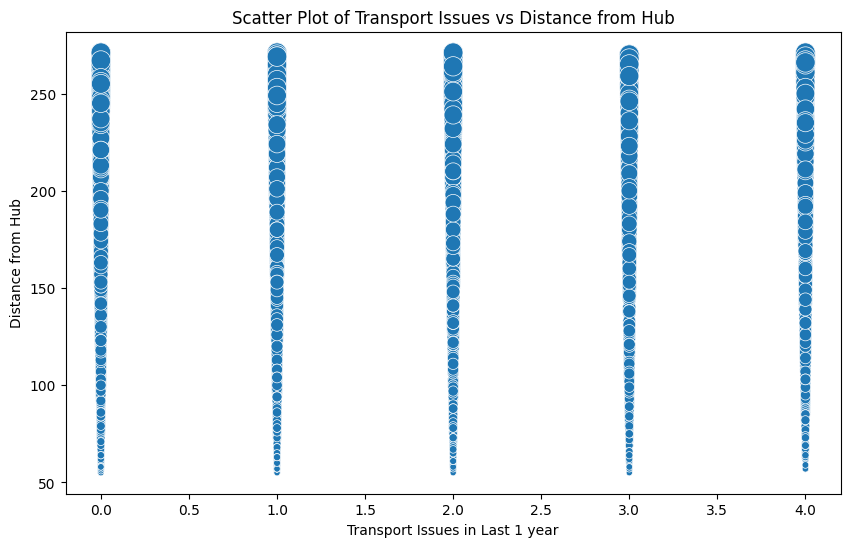

In [27]:
#Q.17 What is the impact of the distance from the hub on the number of transport issues reported?
cor=df["transport_issue_l1y"].corr(df['dist_from_hub'])
print(cor)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='transport_issue_l1y',y='dist_from_hub',
                size='dist_from_hub',sizes=(20,200),legend=False)

plt.title("Scatter Plot of Transport Issues vs Distance from Hub")
plt.xlabel("Transport Issues in Last 1 year")
plt.ylabel("Distance from Hub")
plt.show()


In [28]:
#Q.18 Analyze the effect of competitor presence in the market on the number of refill requests
print("\nThe effect of competitor presence in the market on the number of refill requests.\n",df.pivot_table(index='Competitor_in_mkt',columns='num_refill_req_l3m',values='Ware_house_ID',aggfunc="count"))



The effect of competitor presence in the market on the number of refill requests.
 num_refill_req_l3m      3      4      5      6      7      8
Competitor_in_mkt                                           
0                     NaN    NaN    NaN    NaN    1.0    NaN
1                    39.0   40.0   32.0   36.0   38.0   33.0
2                   802.0  777.0  719.0  710.0  766.0  760.0
3                   634.0  589.0  647.0  580.0  615.0  641.0
4                   599.0  589.0  617.0  598.0  576.0  581.0
5                   117.0   97.0  112.0   98.0   95.0  126.0
6                    45.0   51.0   52.0   56.0   48.0   44.0
7                    18.0   20.0   14.0   16.0   18.0   17.0
8                     9.0    6.0    6.0    6.0    8.0   10.0
9                     1.0    NaN    NaN    NaN    2.0    2.0
10                    1.0    NaN    1.0    NaN    2.0    1.0
12                    NaN    NaN    NaN    NaN    NaN    1.0


In [29]:
#Q.19 Determine if there is a significant difference in the number of storage issues reported between warehouses with and without government certificates.
print("\nNo. of storage issues reported between warehouses with and without government certificates\n",df.pivot_table(index='storage_issue_reported_l3m', columns='approved_wh_govt_certificate', values='Ware_house_ID', aggfunc='count'))



No. of storage issues reported between warehouses with and without government certificates
 approved_wh_govt_certificate      A     A+      B     B+      C
storage_issue_reported_l3m                                     
4                              31.0    NaN   61.0   74.0  147.0
5                             100.0   41.0  148.0  133.0  243.0
6                              93.0   43.0   96.0  101.0  169.0
7                              28.0    4.0   39.0   55.0   86.0
8                               8.0    4.0   50.0   50.0   94.0
9                              83.0   78.0  104.0   74.0   86.0
10                             74.0   71.0   70.0   37.0   68.0
11                             84.0   83.0   76.0   41.0   81.0
12                             73.0   81.0   80.0   45.0   71.0
13                             93.0   80.0   67.0   43.0   71.0
14                             51.0   49.0   56.0  118.0   49.0
15                             50.0   56.0   76.0  125.0   81.0
16         

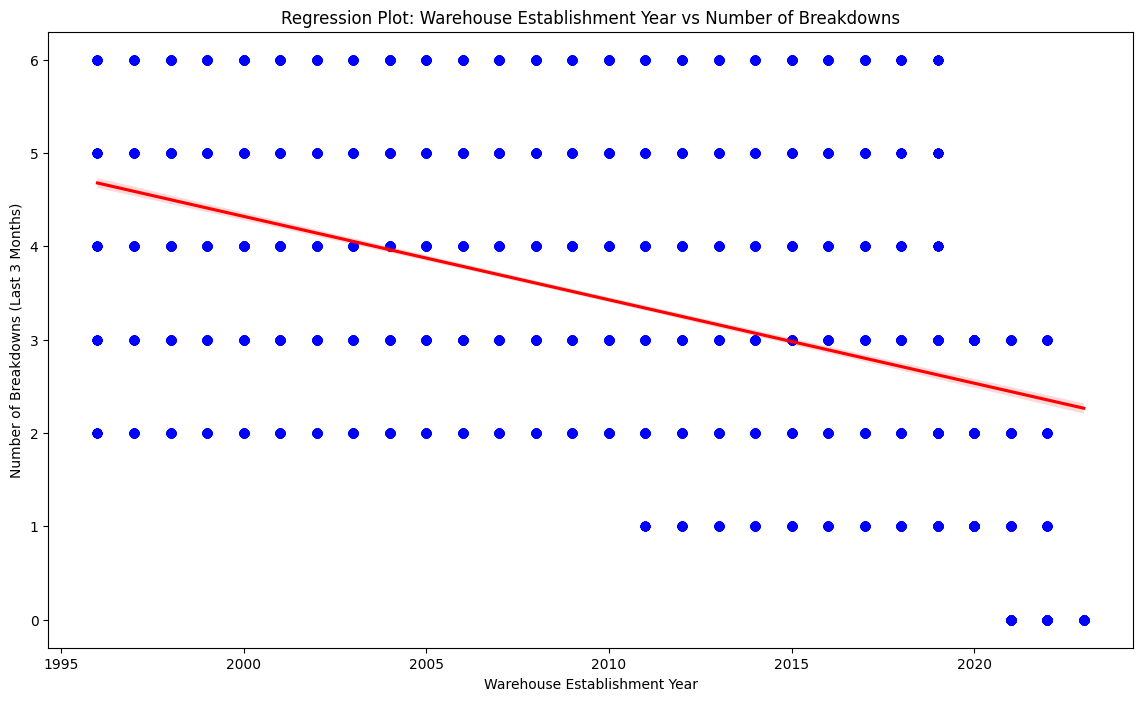

In [30]:
#Q.20 Investigate the relationship between warehouse establishment year and the number of breakdowns reported in the last 3 months
# Regression plot using Seaborn
plt.figure(figsize=(14, 8))
sns.regplot(data=df, x='wh_est_year', y='wh_breakdown_l3m', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Regression Plot: Warehouse Establishment Year vs Number of Breakdowns')
plt.xlabel('Warehouse Establishment Year')
plt.ylabel('Number of Breakdowns (Last 3 Months)')
plt.show()